# CLASSIFICATION OF FASHIONS  

Fashion data set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

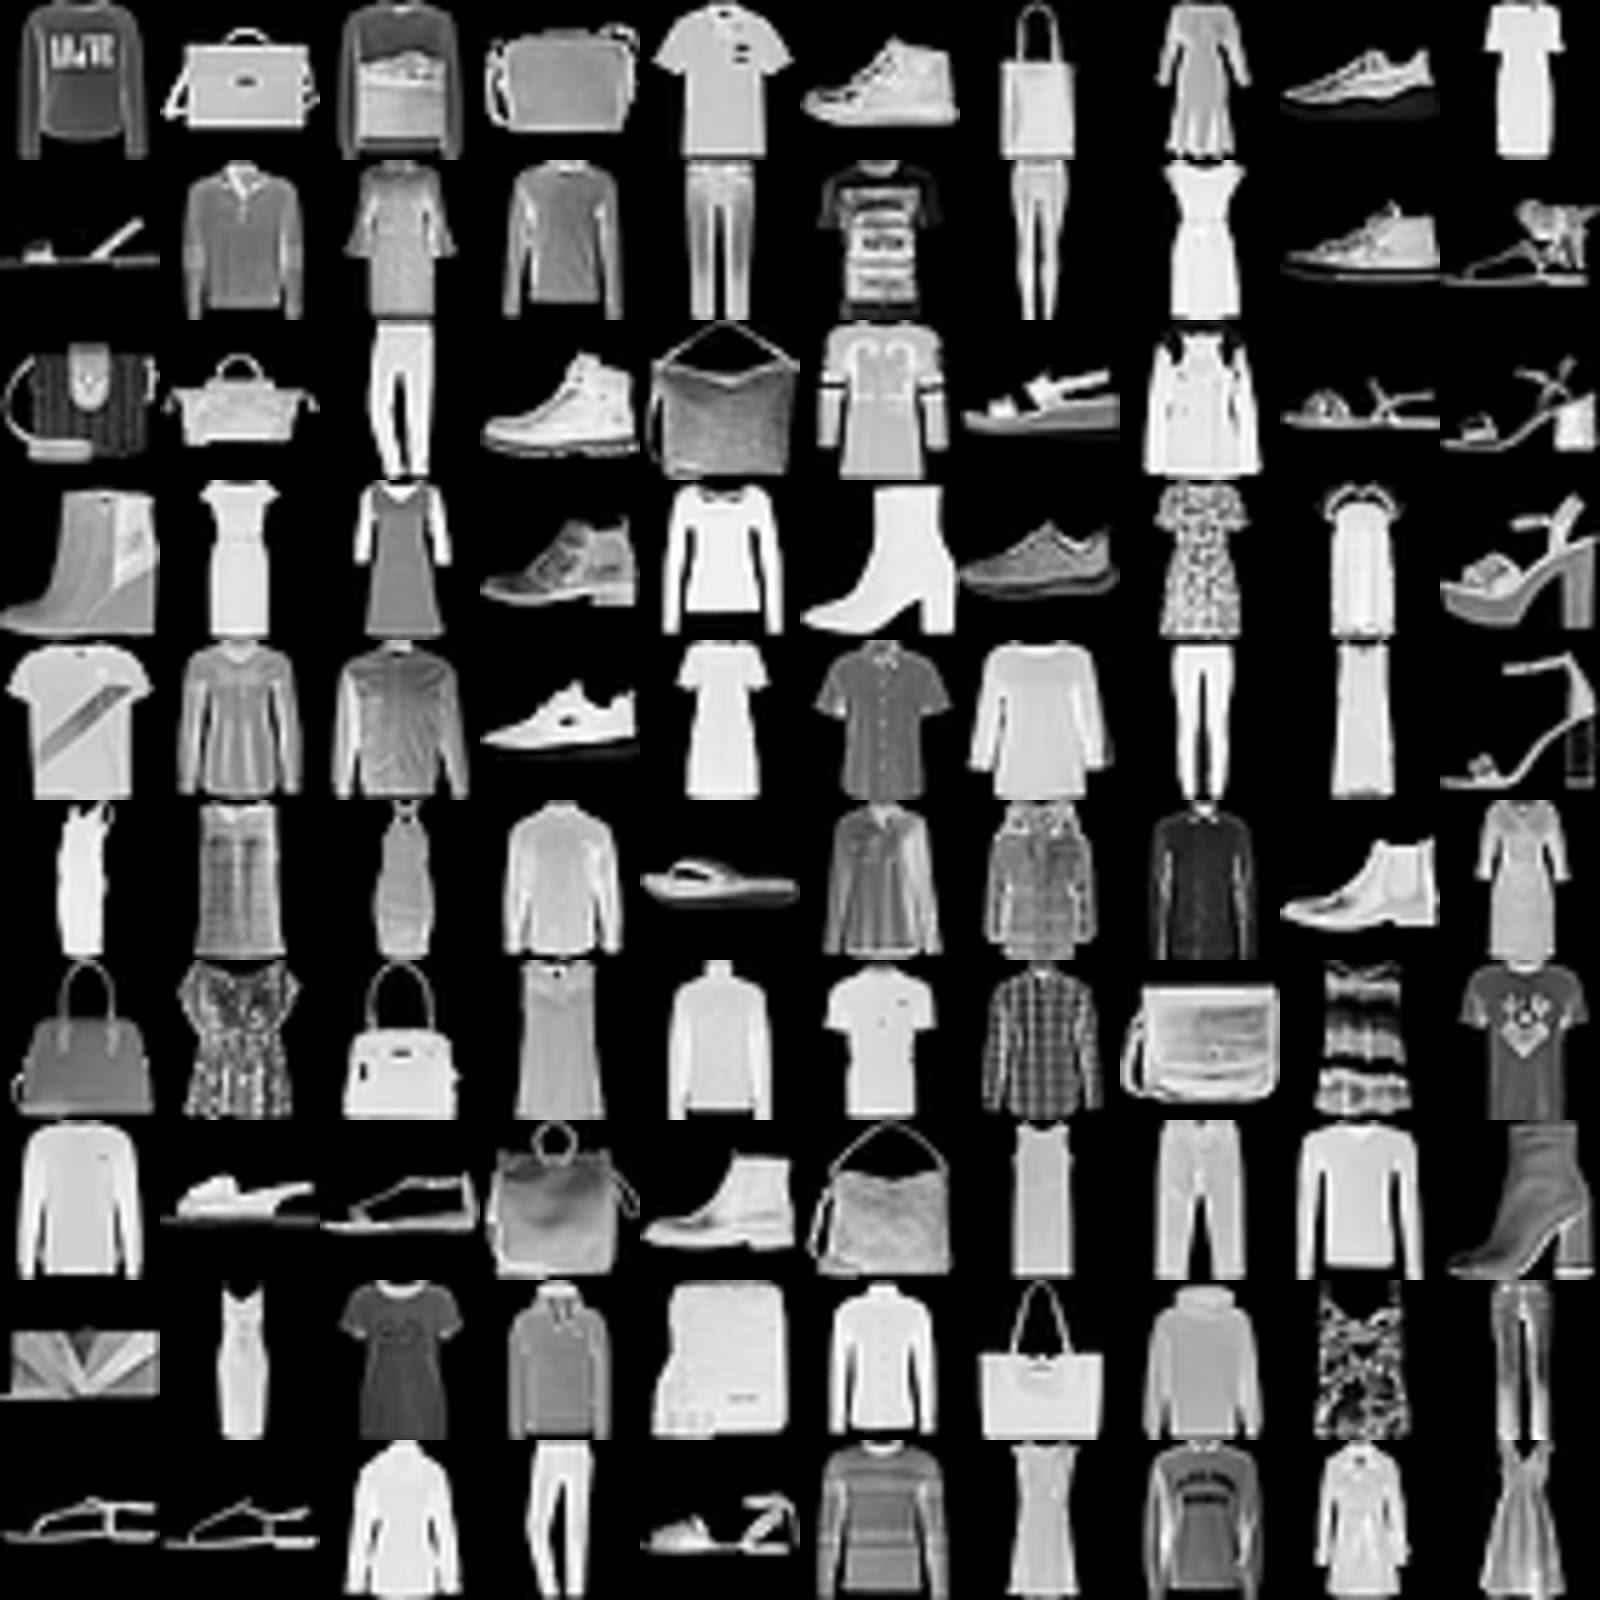


In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
# loading datasets  
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
#checking the training datasets 
fashion_train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(f'shape of train dataset is:', fashion_train_df.shape)

shape of train dataset is: (60000, 785)


In [6]:
print(f'shape of test dataset is:', fashion_test_df.shape)

shape of test dataset is: (10000, 785)


In [7]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

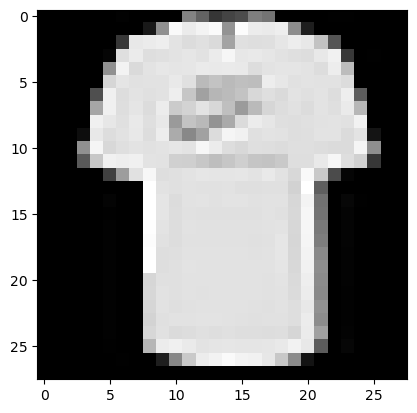

In [8]:
# checking some images!
i = random.randint(1,60000) # randomly selected index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Given the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [9]:
label = training[i,0]
label

0.0

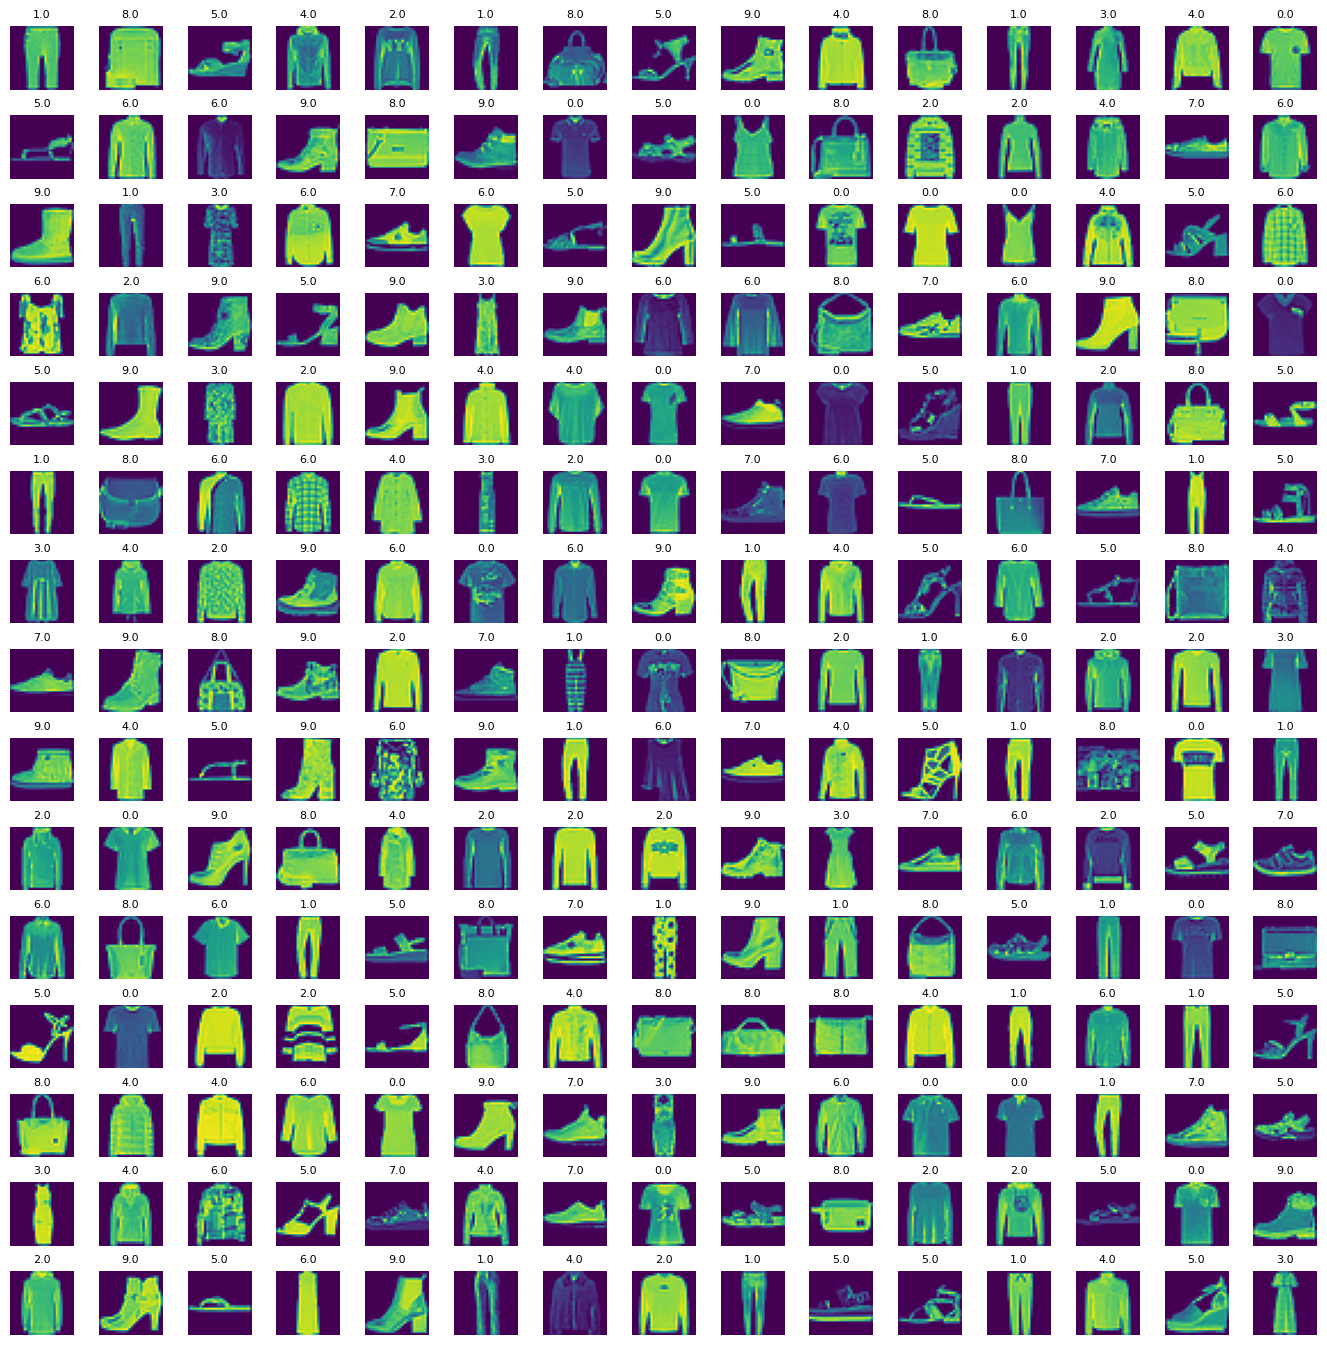

In [10]:
# viewing more images in a grid format
# Defining the dimensions of the plot grid 
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)        

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Normalize training and testing datasets
X_train = training[:,1:] / 255
y_train = training[:,0]
X_test = testing[:,1:] / 255
y_test = testing[:,0]

# Split into train and validation datasets
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_validate = X_validate.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoded format
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_validate = to_categorical(y_validate)

# Define and compile the model
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))  # Change the activation to softmax for multi-class classification
# Compile the model with Adam optimizer and categorical crossentropy loss
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_validate, y_validate))

Epoch 1/50


C:\Users\jeanb\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.6483 - loss: 1.0413 - val_accuracy: 0.8316 - val_loss: 0.4697
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.8510 - loss: 0.4214 - val_accuracy: 0.8652 - val_loss: 0.3792
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.8767 - loss: 0.3537 - val_accuracy: 0.8842 - val_loss: 0.3299
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.8851 - loss: 0.3262 - val_accuracy: 0.8874 - val_loss: 0.3209
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - accuracy: 0.8878 - loss: 0.3128 - val_accuracy: 0.8932 - val_loss: 0.3028
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - accuracy: 0.8991 - loss: 0.2881 - val_accuracy: 0.8988 - val_loss: 0.2856
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.9035 - loss: 0.2751 - val_accuracy: 0.8954 - val_loss: 0.2951
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.9065 - loss: 0.2655 - val_accuracy: 0.901

In [13]:
# Reshape input data
X_test = X_test.reshape(-1, 28, 28, 1)

# Compile the model with the same loss and metrics used during training
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Evaluate the model on the test dataset
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9176 - loss: 0.2569
Test accuracy: 0.9190000295639038


In [14]:
# Get predictions for the test data
predictions = cnn_model.predict(X_test)
print("Shape of predictions:", predictions.shape)
print("First few predictions:", predictions[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Shape of predictions: (10000, 10)
First few predictions: [[9.95409906e-01 3.37963137e-13 5.28446162e-06 1.49341595e-05
  5.73997495e-05 3.15074551e-17 4.51241015e-03 1.02415710e-12
  3.92678992e-08 1.74246722e-14]
 [2.53916408e-08 1.00000000e+00 2.00675920e-09 3.41842710e-09
  2.60774122e-08 1.63888694e-10 6.39210185e-10 9.96901693e-12
  5.68757663e-09 1.11138936e-13]
 [1.53694868e-01 3.86044761e-08 6.88758433e-01 3.07706468e-05
  4.88579622e-04 1.04014894e-13 1.57027319e-01 1.07009139e-08
  7.22297289e-09 2.76418390e-08]
 [3.02973967e-05 9.35860783e-07 9.99644041e-01 1.20349489e-06
  3.51314338e-06 5.06287655e-24 2.50639307e-04 1.91314889e-12
  6.93778929e-05 4.63284586e-15]
 [8.32071635e-07 1.28416888e-10 1.78249946e-04 9.29159820e-01
  7.06266090e-02 5.13916844e-14 3.36860357e-05 5.46473589e-10
  7.59726845e-07 5.35598232e-10]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


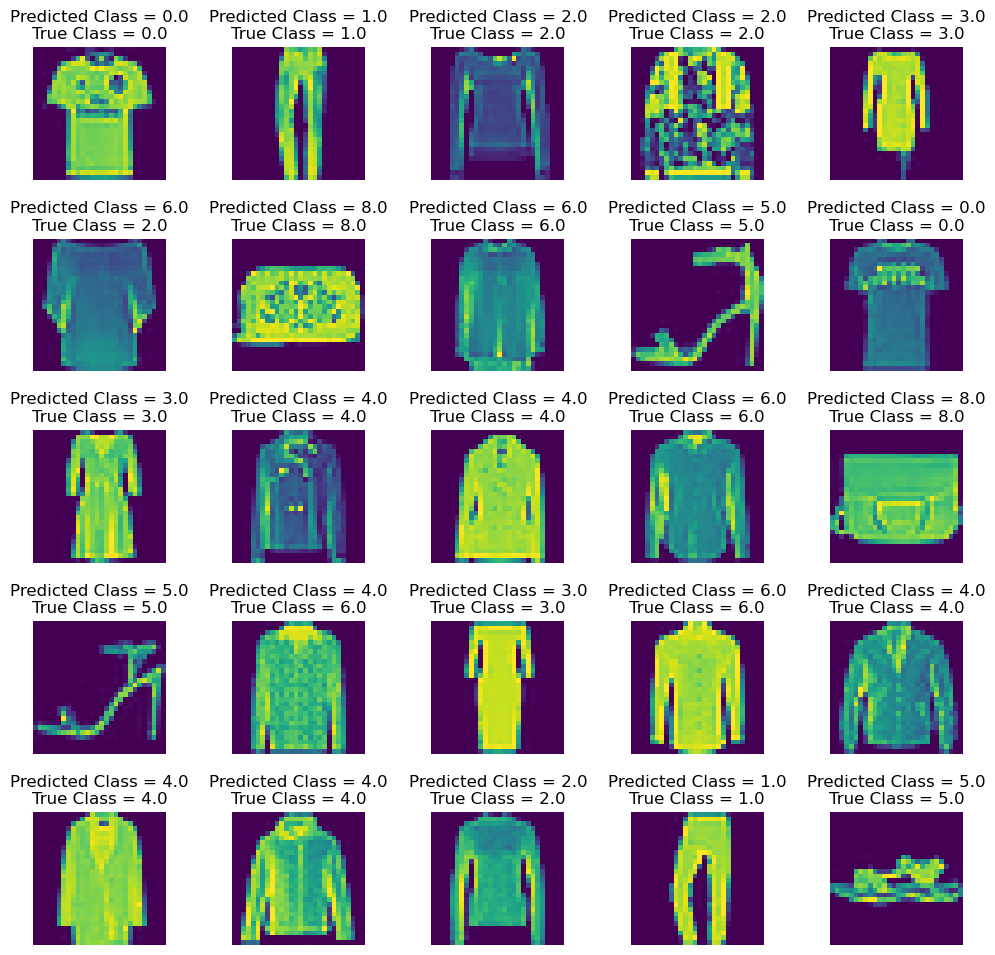

In [15]:
# Visualizing Predictions
# Get predicted probabilities for each class
predicted_probabilities = cnn_model.predict(X_test)
# Find the class with the highest probability for each sample
predicted_classes = np.argmax(predicted_probabilities, axis=1)
# Visualize the predictions
num_rows = 5
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, num_rows * num_cols):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Predicted Class = {:0.1f}\nTrue Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

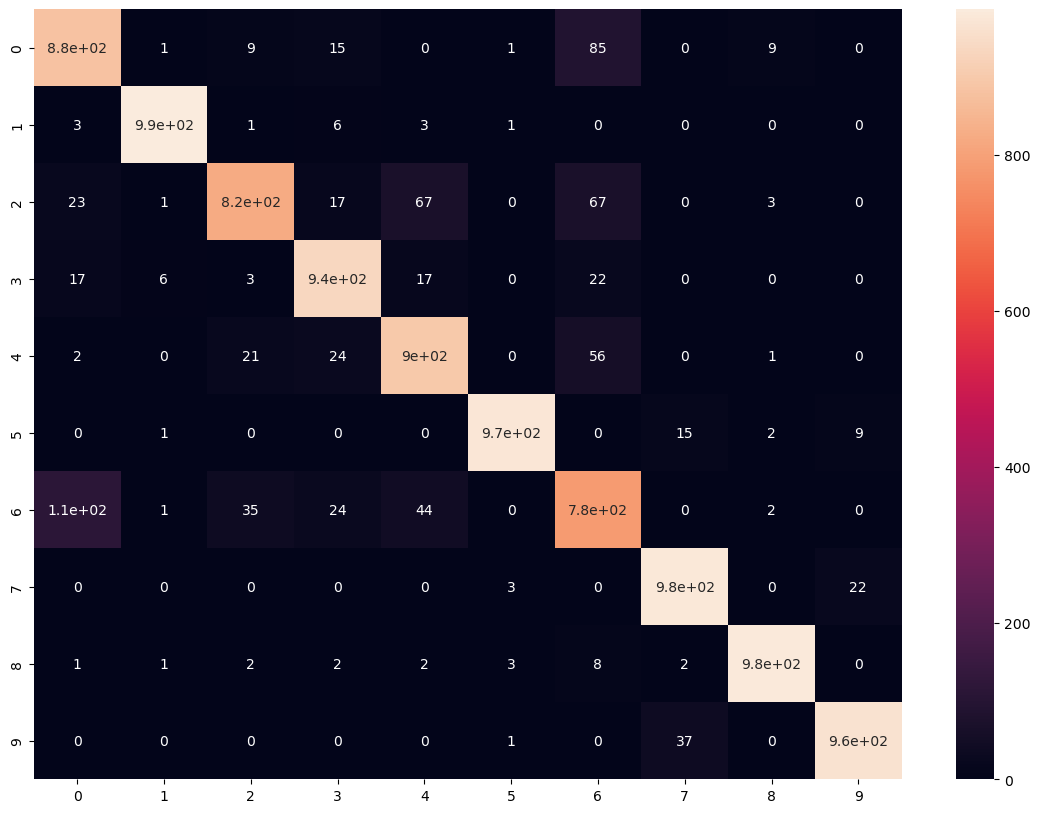

In [16]:
# Visualizing Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True)

In [17]:
# Importing necessary libraries
from sklearn.metrics import classification_report

# Define the number of classes
num_classes = 10

# Define target names for the classification report
target_names = ["Class {}".format(i) for i in range(num_classes)]

# Print classification report
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.82      0.87      1000
     Class 3       0.91      0.94      0.92      1000
     Class 4       0.87      0.90      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.78      0.77      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



"""The machine learning model will be trained to accurately classify these images based on their pixel values, enabling it to identify the type of clothing item depicted in new unseen images"""